<a href="https://colab.research.google.com/github/platekk/Applied-Machine-Learning/blob/main/Porosity_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries
Import necessary libraries

In [2]:
#Libraries

import numpy as np
import pandas as pd
from skimage import io
from skimage import io, exposure
from skimage import util
from pandas.io.formats.excel import ExcelFormatter
from openpyxl import Workbook
import os
import random

from google.colab import drive


#Input data

Before code execution, import folder containing images and prepared excel file to your Google Drive. Then, fill in following data:

- **root_path** - path to folder where all data (image folder and excel file) will be stored.
- **sample_code** - will be further used as excel spreadsheet name. If declared sample code already exists as sheet name in excel file, the data will be replaced;
- **image_folder** - replace text in quotation mark with folder name preceded by "/".
- **excel_file** - replace text in quotation mark with file name including file extension preceded by "/".  The file MUST be placed in the same folder on gdrive as the the image folders and should not be edited as google sheets.

In [3]:
#Input and output path
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/2025/Badania/TiO2 SPS Seria x5/przekroje/porowatosc'

sample_code = "H10_75"
image_folder = root_path + r"/H10_75"

excel_file = root_path + "/Kopia przetopione.xlsx"

Mounted at /content/gdrive


# Settings

Firstly, random file from specified folder will be displayed to enable adjustment of cropping, contrast and treshold settings.

<ipython-input-4-df2c61fe3c86>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(rnd_image)


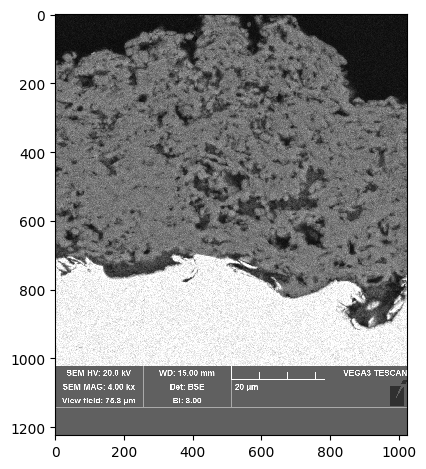

In [4]:
#Show random image

random_file = random.choice(os.listdir(image_folder))
rnd_image = io.imread(image_folder + r"/" + random_file)

io.imshow(rnd_image)

## Choose side

Choose the analyzed area by changing the _crop_start and _crop_end values - the value is given in pixels, while the letter (X, Y) represents a specific axis.

<ipython-input-27-28ee317c5446>:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(rnd_image_cropped)


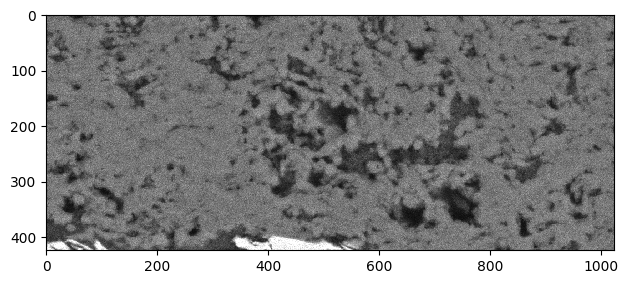

In [27]:
#Image cropping
Y_crop_start = 300
Y_crop_end = 724

X_crop_start = 0
X_crop_end = 1024


rnd_image_cropped = rnd_image[Y_crop_start:Y_crop_end, X_crop_start:X_crop_end]
io.imshow(rnd_image_cropped)

##Contrast

Contrast and exposure can be changed by changing cutoff and gain values.

Default values:
```
cutoff_value = 0.5
gain_value = 5
```

Recommended values:
```
cutoff_value = 0.2
gain_value = 30
```



<ipython-input-18-45bed0f81522>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(rnd_image_corrected)


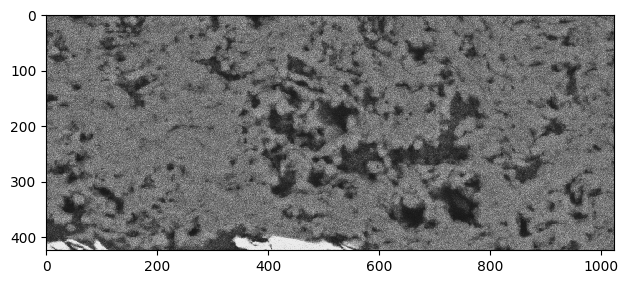

In [18]:
#Contrast settings

cutoff_value = 0.5
gain_value = 5
rnd_image_corrected = exposure.adjust_sigmoid(rnd_image_cropped, cutoff=cutoff_value, gain=gain_value, inv=False)

io.imshow(rnd_image_corrected)



## Treshold
Treshold defines the level of darkness representing pores. The values range from 0 to 1 where 0 represents none and 1 implies any level.


<ipython-input-19-d3eed3e42f01>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(rnd_binary_image,cmap="Greys")
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


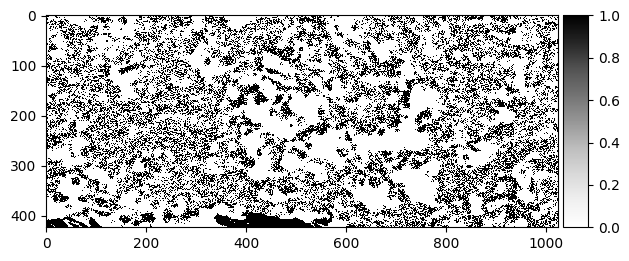

In [19]:
#Binary image - treshold

treshold = 0.47
rnd_binary_image = ((rnd_image_corrected/255)>=treshold).astype(int)
io.imshow(rnd_binary_image,cmap="Greys")


#Porosity measurement

Now, using above declared settings, porosity measurement will be executed on all images from specified folder.
If the image was additionally croped, the

In [23]:

#Function

def porosity(input_path):
    input_image = io.imread(image_folder + r"/" + input_path)

    cropped_image = input_image[Y_crop_start:Y_crop_end, X_crop_start:X_crop_end]

    corrected_image = exposure.adjust_sigmoid(cropped_image, cutoff=cutoff_value, gain=gain_value, inv=False)
    binary_image = ((corrected_image/255)>=treshold).astype(int)

    porosity = binary_image.size - binary_image.sum()
    porosity_percentage = (porosity/binary_image.size)*100

    return porosity_percentage



In [24]:
#Results

results = []
for image in os.listdir(image_folder):
    porosity(image)
    p = porosity(image)
    results.append([image,p])

df= pd.DataFrame.from_records(results, columns=["sample_code", "porosity"])

mean = df["porosity"].mean()
stdev = df["porosity"].std()
print("Mean:",mean,"σ:", stdev)

Mean: 71.52627429122447 σ: 2.791888425739623


#Data export

Collected data will be saved in excel file with average and standard deviation included. Mean value and standard deviation σ will be printed. To display all data, remove "#" from the last line.

In [25]:
#Data

results.append([image,p, mean, stdev])
df2= pd.DataFrame.from_records(results, columns=["sample_code", "porosity", "mean", "stdev"])




In [26]:
with pd.ExcelWriter(excel_file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df2.to_excel(writer, sheet_name=sample_code)


#df2
